In [1]:
import pandas as pd
import numpy as np

import glob
from shutil import copyfile

In [2]:
label_to_name = {
    0: "Nucleoplasm",
    1: "Nuclear membrane",
    2: "Nucleoli",
    3: "Nucleoli fibrillar center",
    4: "Nuclear speckles",
    5: "Nuclear bodies",
    6: "Endoplasmic reticulum",
    7: "Golgi apparatus",
    8: "Intermediate filaments",
    9: "Actin filaments",
    10: "Microtubules",
    11: "Mitotic spindle",
    12: "Centrosome",
    13: "Plasma membrane",
    14: "Mitochondria",
    15: "Aggresome",
    16: "Cytosol",
    17: "Vesicles and punctate cytosolic patterns",
    18: "Negative"
}

name_label = {
     "Nucleoplasm":0,
    "Nuclear membrane":1,
    "Nucleoli":2,
    "Nucleoli fibrillar center":3,
    "Nuclear speckles":4,
    "Nuclear bodies":5,
    "Endoplasmic reticulum":6,
    "Golgi apparatus":7,
    "Intermediate filaments":8,
    "Actin filaments":9,
    "Microtubules":10,
    "Mitotic spindle":11,
    "Centrosome":12,
    "Plasma membrane":13,
    "Mitochondria":14,
    "Aggresome":15,
    "Cytosol":16,
    "Vesicles and punctate cytosolic patterns":17,
    "Negative":18
}

## Create folder structure based on cell types

In [12]:
from pathlib import Path
root = 'data/flow-new/'
for key in name_label.keys():
    Path(f"{root}/{key}").mkdir(parents=True, exist_ok=True)
from shutil import copyfile

## Build filname and labels

In [4]:
files = glob.glob(f"data/single-class-individual-images/*.png")
data = { "name":[], "label":[]}
for file_name in files:
    first_level = file_name.split(sep="\\")
    name = first_level[1]
    tokens = first_level[1].split(sep="_")
    data["name"].append(name)
    data["label"].append(tokens[1])

print(len(data["name"]))
print(len(data["label"]))

243156
243156


## Split and store the train and validation images in the right folders

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df = pd.DataFrame(data)

In [9]:
X = []
y =[]

for index, row in df.iterrows():
    X.append(row['name'])
    y.append(row["label"])

In [10]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=54321, shuffle=True, stratify=y)

In [11]:
src = 'data/single-class-individual-images/'
dest = 'data/flow/train/'
for index in range(len(X_train)):
    copyfile(f'{src}{X_train[index]}', f'{dest}{y_train[index]}/{X_train[index]}')

In [12]:
src = 'data/single-class-individual-images/'
dest = 'data/flow/validation/'
for index in range(len(X_remaining)):
    copyfile(f'{src}{X_remaining[index]}', f'{dest}{y_remaining[index]}/{X_remaining[index]}')

## File Sample details

In [3]:
import os, os.path

In [9]:
path, dirs, files = next(os.walk('data/flow/train/'))
dirs

['Actin filaments',
 'Aggresome',
 'Centrosome',
 'Cytosol',
 'Endoplasmic reticulum',
 'Golgi apparatus',
 'Intermediate filaments',
 'Microtubules',
 'Mitochondria',
 'Mitotic spindle',
 'Negative',
 'Nuclear bodies',
 'Nuclear membrane',
 'Nuclear speckles',
 'Nucleoli',
 'Nucleoli fibrillar center',
 'Nucleoplasm',
 'Plasma membrane',
 'Vesicles and punctate cytosolic patterns']

In [10]:
train_files_count = []
for sub_dir in dirs:
    p, d, f = next(os.walk(f'data/flow/train/{sub_dir}/'))
    train_files_count.append(len(f))

In [11]:
validation_files_count = []
for sub_dir in dirs:
    p, d, f = next(os.walk(f'data/flow/validation/{sub_dir}/'))
    validation_files_count.append(len(f))

In [16]:
samples_dict = { 
    'Cell_Type':dirs, 
    'Train_SampleCount': train_files_count, 
    'Validation_Sample_Count': validation_files_count
}

df = pd.DataFrame(samples_dict)
df

,Cell_Type,Train_SampleCount,Validation_Sample_Count
0,Actin filaments,4196,1049
1,Aggresome,1696,424
2,Centrosome,10921,2730
3,Cytosol,17973,4493
4,Endoplasmic reticulum,8103,2026
5,Golgi apparatus,14757,3689
6,Intermediate filaments,8481,2120
7,Microtubules,6205,1551
8,Mitochondria,21623,5406
9,Mitotic spindle,8,2


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

<Figure size 864x720 with 0 Axes>

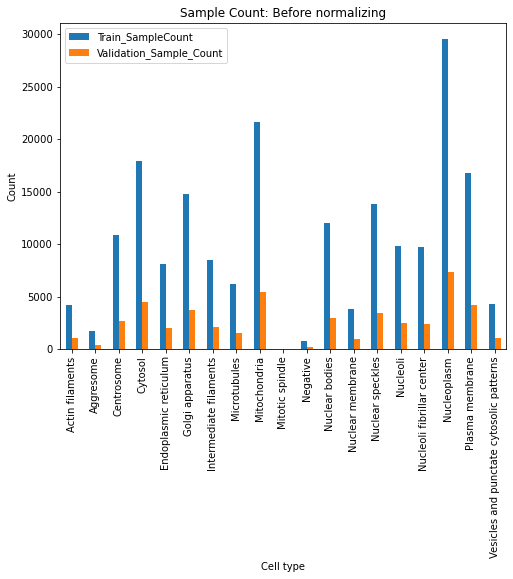

In [22]:
plot_df = df[["Train_SampleCount","Validation_Sample_Count"]]
plot_df.index = df['Cell_Type']

plt.figure(figsize=(12,10))
plot_df[["Train_SampleCount","Validation_Sample_Count"]].plot(kind="bar", figsize=(8,6))
plt.title("Sample Count: Before normalizing")
plt.xlabel("Cell type")
plt.ylabel("Count")

In [24]:
from random import sample
import shutil

In [30]:
src = 'data/flow/validation/'
dest = 'data/flow-new/validation/'
for sub_dir in dirs:
    files = glob.glob(f'{src}{sub_dir}/*.png')
    files = [os.path.basename(f) for f in files]
    if(len(files)>600):
        files = sample(files, 600)

    for f in files:
        shutil.copy(f'{src}{sub_dir}/{f}', f'{dest}{sub_dir}/{f}')

In [23]:
train_files_count = []
for sub_dir in dirs:
    p, d, f = next(os.walk(f'data/flow-new/train/{sub_dir}/'))
    train_files_count.append(len(f))
    
validation_files_count = []
for sub_dir in dirs:
    p, d, f = next(os.walk(f'data/flow-new/validation/{sub_dir}/'))
    validation_files_count.append(len(f))
    
samples_dict = { 
    'Cell_Type':dirs, 
    'Train_SampleCount': train_files_count, 
    'Validation_Sample_Count': validation_files_count
}

df = pd.DataFrame(samples_dict)
df

,Cell_Type,Train_SampleCount,Validation_Sample_Count
0,Actin filaments,4196,600
1,Aggresome,1696,424
2,Centrosome,4500,600
3,Cytosol,4500,600
4,Endoplasmic reticulum,4500,600
5,Golgi apparatus,4500,600
6,Intermediate filaments,4500,600
7,Microtubules,4500,600
8,Mitochondria,4500,600
9,Mitotic spindle,8,2


Text(0, 0.5, 'Count')

<Figure size 864x720 with 0 Axes>

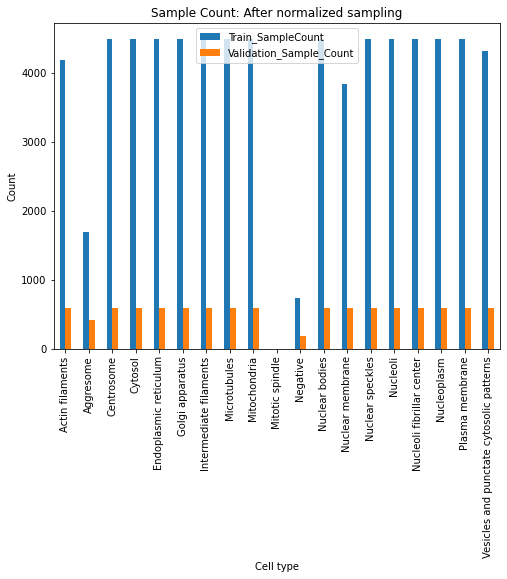

In [25]:
plot_df = df[["Train_SampleCount","Validation_Sample_Count"]]
plot_df.index = df['Cell_Type']

plt.figure(figsize=(12,10))
plot_df[["Train_SampleCount","Validation_Sample_Count"]].plot(kind="bar", figsize=(8,6))
plt.title("Sample Count: After normalized sampling")
plt.xlabel("Cell type")
plt.ylabel("Count")